# The open-source toolbox of the nuclear safeguards data scientist: supplement

Text here to summarize basic goals with the notebook

Basic imports here to be described.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition
from mpl_toolkits.mplot3d import axes3d

## Loading the data

Reading the same as Matilda, describe what is there. Are we interested in TOT_SF, etc etc.

Describe where data can be accessed.

First just see columns.

In [3]:
print(pd.read_csv('UU_PWR_UOX-MOX.csv', index_col=0, nrows=0).columns.tolist())

['BU', 'CT', 'IE', 'fuelType', 'TOT_SF', 'TOT_GSRC', 'TOT_A', 'TOT_H', 'H1', 'H2', 'H3', 'He3', 'He4', 'Li6', 'Li7', 'Be9', 'B10', 'B11', 'C12', 'N14', 'N15', 'O16', 'O17', 'Ga69', 'Ga71', 'Ge70', 'Ge72', 'Ge73', 'Ge74', 'Ge76', 'As74', 'As75', 'Se74', 'Se76', 'Se77', 'Se78', 'Se79', 'Se80', 'Se82', 'Br79', 'Br81', 'Kr78', 'Kr80', 'Kr82', 'Kr83', 'Kr84', 'Kr85', 'Kr86', 'Rb85', 'Rb86', 'Rb87', 'Sr84', 'Sr86', 'Sr87', 'Sr88', 'Sr89', 'Sr90', 'Y89', 'Y90', 'Y91', 'Zr90', 'Zr91', 'Zr92', 'Zr93', 'Zr94', 'Zr95', 'Zr96', 'Nb93', 'Nb94', 'Nb95', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'Mo99', 'Mo100', 'Tc99', 'Ru98', 'Ru99', 'Ru100', 'Ru101', 'Ru102', 'Ru103', 'Ru104', 'Ru105', 'Ru106', 'Rh103', 'Rh105', 'Pd102', 'Pd104', 'Pd105', 'Pd106', 'Pd107', 'Pd108', 'Pd110', 'Ag107', 'Ag109', 'Ag111', 'Ag110m', 'Cd106', 'Cd108', 'Cd110', 'Cd111', 'Cd112', 'Cd113', 'Cd114', 'Cd115', 'Cd116', 'Cd115m', 'In113', 'In115', 'Sn112', 'Sn113', 'Sn114', 'Sn115', 'Sn116', 'Sn117', 'Sn118', 'Sn119', 'Sn

In [4]:
colInterest=['BU','CT','IE','fuelType','Ce141','Nb95','Y91','Zr95','Ce144','Ru106','Cs134','Eu154','Cs137']

fueldata=pd.read_csv('UU_PWR_UOX-MOX.csv',header = 0, usecols=colInterest)
fueldata.head()

,BU,CT,IE,fuelType,Y91,Zr95,Nb95,Ru106,Cs134,Cs137,Ce141,Ce144,Eu154
0,5.0,0.00,1.5,UOX,2.397170e-06,3.166171e-06,1.478996e-06,1.505257e-06,1.924658e-07,0.000008,1.709536e-06,0.000005,2.945246e-08
1,5.0,91.25,1.5,UOX,8.132495e-07,1.178869e-06,1.036539e-06,1.269661e-06,1.769621e-07,0.000008,2.441769e-07,0.000004,2.886479e-08
2,5.0,182.50,1.5,UOX,2.758981e-07,4.389314e-07,4.656899e-07,1.070940e-06,1.627073e-07,0.000008,3.487634e-08,0.000003,2.828885e-08
3,5.0,273.75,1.5,UOX,9.359952e-08,1.634285e-07,1.864606e-07,9.033212e-07,1.496008e-07,0.000007,4.981466e-09,0.000003,2.772439e-08
4,5.0,365.00,1.5,UOX,3.175401e-08,6.084978e-08,7.156699e-08,7.619375e-07,1.375500e-07,0.000007,7.115140e-10,0.000002,2.717120e-08


Some basic plot of the Cs-137 content to review how to filter data, and show how to do plotting. Explain why the 1e24 multiplier.

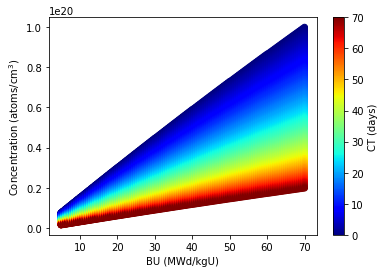

In [13]:
subfuel=fueldata[(fueldata['IE']==3.0) & (fueldata['fuelType']=='UOX')]
plt.figure()
plt.scatter(subfuel['BU'], subfuel['Cs137']*1e24,c=subfuel['CT']/365, cmap='jet')
plt.xlabel('BU (MWd/kgU)')
plt.ylabel('Concentration (atoms/cm$^3$)')
plt.colorbar(label='CT (days)')
plt.show()

## Convert to activity concentration

Calculate activity from the concentrations. Since that is more close to what one would measure.

In [5]:
halflife={'Y91':58.5,
          'Zr95':64,
          'Nb95':35,
          'Ru106':372,
          'Cs134':2.065*365,
          'Cs137':30.1*365,
          'Eu154':8.6*365,
          'Ce141':32.5,
          'Ce144':285
          }

d2s=86400

for iso in halflife:
    fueldata[iso+'A']=fueldata[iso]*1e24*(np.log(2)/(halflife[iso]*d2s))
fueldata.head()

,BU,CT,IE,fuelType,Y91,Zr95,Nb95,Ru106,Cs134,Cs137,...,Eu154,Y91A,Zr95A,Nb95A,Ru106A,Cs134A,Cs137A,Eu154A,Ce141A,Ce144A
0,5.0,0.00,1.5,UOX,2.397170e-06,3.166171e-06,1.478996e-06,1.505257e-06,1.924658e-07,0.000008,...,2.945246e-08,3.287416e+11,3.968863e+11,3.390087e+11,3.246231e+10,2.048577e+09,5.569977e+09,7.527349e+07,4.219944e+11,1.397063e+11
1,5.0,91.25,1.5,UOX,8.132495e-07,1.178869e-06,1.036539e-06,1.269661e-06,1.769621e-07,0.000008,...,2.886479e-08,1.115269e+11,1.477737e+11,2.375906e+11,2.738146e+10,1.883558e+09,5.537918e+09,7.377154e+07,6.027441e+10,1.118922e+11
2,5.0,182.50,1.5,UOX,2.758981e-07,4.389314e-07,4.656899e-07,1.070940e-06,1.627073e-07,0.000008,...,2.828885e-08,3.783594e+10,5.502099e+10,1.067433e+11,2.309584e+10,1.731832e+09,5.506043e+09,7.229955e+07,8.609129e+09,8.961557e+10
3,5.0,273.75,1.5,UOX,9.359952e-08,1.634285e-07,1.864606e-07,9.033212e-07,1.496008e-07,0.000007,...,2.772439e-08,1.283599e+10,2.048611e+10,4.273963e+10,1.948099e+10,1.592328e+09,5.474351e+09,7.085694e+07,1.229661e+09,7.177401e+10
4,5.0,365.00,1.5,UOX,3.175401e-08,6.084978e-08,7.156699e-08,7.619375e-07,1.375500e-07,0.000007,...,2.717120e-08,4.354661e+09,7.627650e+09,1.640425e+10,1.643191e+10,1.464062e+09,5.442842e+09,6.944312e+07,1.756353e+08,5.748453e+10


## Correlations

Correlation of signatures to targets for MOX.

Also here one can mention feature ranking.

$corr(x_iy)=\frac{E(x_i\cdot y)-E(x_i)\cdot E(y)}{\sigma_{x_i}\sigma_y}\cdot 100 (\%)$


In [6]:
colInterest=['BU','CT','IE','fuelType','Ce141A','Nb95A','Y91A','Zr95A','Ce144A','Ru106A','Cs134A','Eu154A','Cs137A']

subfuel=fueldata[fueldata['fuelType']=='MOX'][colInterest]
subfuel.head()

,BU,CT,IE,fuelType,Ce141A,Nb95A,Y91A,Zr95A,Ce144A,Ru106A,Cs134A,Eu154A,Cs137A
789406,5.0,0.00,4.0,MOX,3.848142e+11,2.621000e+11,1.779205e+11,3.112505e+11,1.074759e+11,9.475441e+10,1.705952e+09,1.057081e+08,5.694467e+09
789407,5.0,91.25,4.0,MOX,5.496388e+10,1.857096e+11,6.036024e+10,1.158887e+11,8.607856e+10,7.992389e+10,1.568533e+09,1.035989e+08,5.661691e+09
789408,5.0,182.50,4.0,MOX,7.850615e+09,8.361037e+10,2.047745e+10,4.314917e+10,6.894118e+10,6.741457e+10,1.442183e+09,1.015317e+08,5.629104e+09
789409,5.0,273.75,4.0,MOX,1.121321e+09,3.350119e+10,6.947056e+09,1.606584e+10,5.521569e+10,5.686316e+10,1.326011e+09,9.950583e+07,5.596704e+09
789410,5.0,365.00,4.0,MOX,1.601608e+08,1.286201e+10,2.356816e+09,5.981839e+09,4.422280e+10,4.796320e+10,1.219197e+09,9.752037e+07,5.564490e+09


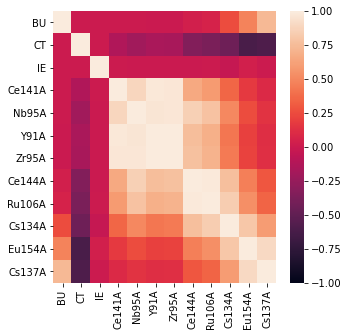

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(subfuel.corr(),annot=False,vmin=-1,vmax=1)
plt.savefig('heatmap1.png')
plt.show()

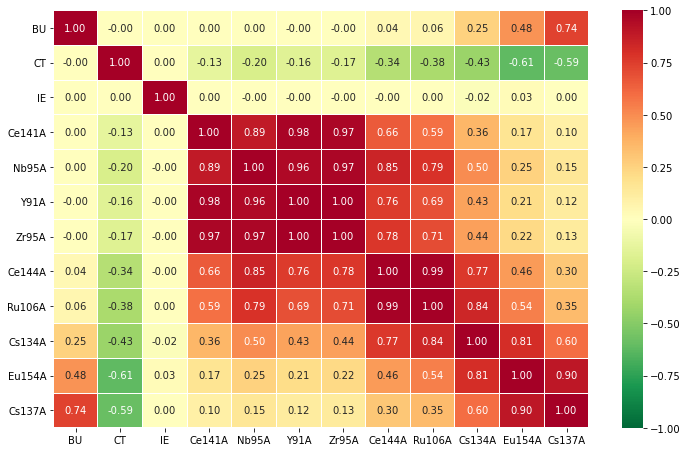

In [58]:
f, ax = plt.subplots(figsize=(12, 7.2))
corr = subfuel.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap='RdYlGn_r',fmt='.2f',
                     linewidths=.05, vmin=-1,vmax=1)
    # plt.yticks(np.arange(16)+1.5,tl, rotation=0, fontsize="10", va="center")
f.subplots_adjust(top=0.93)
#t= f.suptitle('PWR Fuel Feature Correlation Heatmap', fontsize=14)
plt.savefig('heatmap.png', dpi=300, bbox_inches = "tight")

## Principal component analysis

Short summary what it is and why we want to do it.


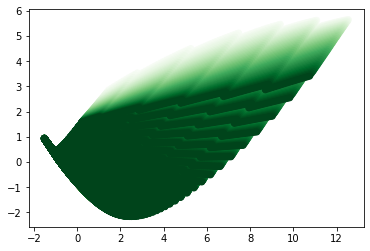

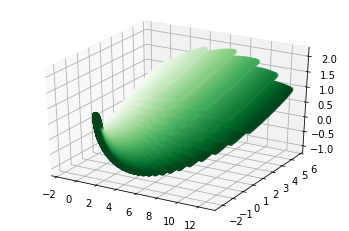

In [35]:
features = ['Ru106', 'Cs134', 'Eu154', 'Cs137']
subfuel=fueldata[(fueldata["BU"]>= 15) & (fueldata["IE"] <= 5.5) & (fueldata["fuelType"] == 'UOX')]
X = subfuel.loc[:, features].values
X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=4)
pca.fit(X)
Xt = pca.transform(X)

plt.scatter(Xt[:,0],Xt[:,1],c=subfuel.IE, cmap='Greens')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfuel.BU, cmap='Greens');
plt.show()


Here i try to mimic http://uu.diva-portal.org/smash/get/diva2:1172034/FULLTEXT01.pdf Fig. 7.4 and Fig. 7.5 on page 51 and 52.

1-10y fuel, so only some of the nuclide activities are included, normalized to sum=1.

Hard to visually compare, nevertheless the UOX seems to have a "saddle" shape in or case as well, whereas the MOX has a simpler shape.
 

In [36]:
subfuel=fueldata[(fueldata["CT"]>=1*365) & (fueldata["CT"] <= 10*365) & (fueldata["BU"] <= 60)].sample(n=10000,random_state=1)
subfuelUOX=subfuel[(subfuel["fuelType"] == 'UOX')]
subfuelMOX=subfuel[(subfuel["fuelType"] == 'MOX')]

features=['Ce144A','Ru106A','Cs134A','Eu154A','Cs137A']

XUOX = subfuelUOX.loc[:, features]
XMOX = subfuelMOX.loc[:, features]

XUOX[features]=XUOX[features].apply(lambda row: row/sum(row.values), axis=1)
XMOX[features]=XMOX[features].apply(lambda row: row/sum(row.values), axis=1)

XUOX = XUOX.values
XMOX = XMOX.values
#XUOX = StandardScaler().fit_transform(XUOX)
#XMOX = StandardScaler().fit_transform(XMOX)

pcaU = decomposition.PCA(n_components=5)
pcaU.fit(XUOX)
XtUOX = pcaU.transform(XUOX)

pcaM = decomposition.PCA(n_components=5)
pcaM.fit(XUOX)
XtMOX = pcaM.transform(XMOX)

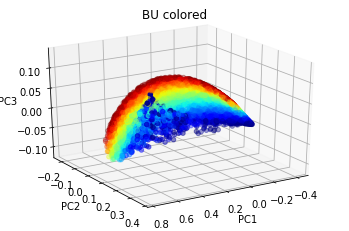

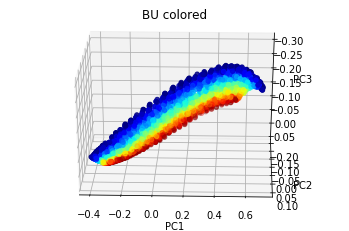

In [37]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(XtUOX[:,0], XtUOX[:,1], XtUOX[:,2], c=subfuelUOX.BU, cmap='jet');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=25., azim=58)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(XtMOX[:,0], XtMOX[:,1], XtMOX[:,2], c=subfuelMOX.BU, cmap='jet');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=-154, azim=-92)
plt.show()

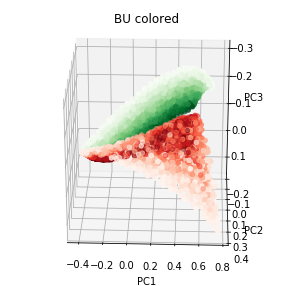

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(XtUOX[:,0], XtUOX[:,1], XtUOX[:,2], c=subfuelUOX.BU, cmap='Reds');
ax.scatter3D(XtMOX[:,0], XtMOX[:,1], XtMOX[:,2], c=subfuelMOX.BU, cmap='Greens');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=-154, azim=-92)
plt.show()

## Regression problem

Here some regression with sklearn. Maybe Randomforest, or what was deemed best in your ESARDA paper?
Do some basic hyperparameter tuning for MOX

In [3]:
print(pd.read_csv('UU_PWR_UOX-MOX.csv', index_col=0, nrows=0).columns.tolist())

['BU', 'CT', 'IE', 'fuelType', 'TOT_SF', 'TOT_GSRC', 'TOT_A', 'TOT_H', 'H1', 'H2', 'H3', 'He3', 'He4', 'Li6', 'Li7', 'Be9', 'B10', 'B11', 'C12', 'N14', 'N15', 'O16', 'O17', 'Ga69', 'Ga71', 'Ge70', 'Ge72', 'Ge73', 'Ge74', 'Ge76', 'As74', 'As75', 'Se74', 'Se76', 'Se77', 'Se78', 'Se79', 'Se80', 'Se82', 'Br79', 'Br81', 'Kr78', 'Kr80', 'Kr82', 'Kr83', 'Kr84', 'Kr85', 'Kr86', 'Rb85', 'Rb86', 'Rb87', 'Sr84', 'Sr86', 'Sr87', 'Sr88', 'Sr89', 'Sr90', 'Y89', 'Y90', 'Y91', 'Zr90', 'Zr91', 'Zr92', 'Zr93', 'Zr94', 'Zr95', 'Zr96', 'Nb93', 'Nb94', 'Nb95', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'Mo99', 'Mo100', 'Tc99', 'Ru98', 'Ru99', 'Ru100', 'Ru101', 'Ru102', 'Ru103', 'Ru104', 'Ru105', 'Ru106', 'Rh103', 'Rh105', 'Pd102', 'Pd104', 'Pd105', 'Pd106', 'Pd107', 'Pd108', 'Pd110', 'Ag107', 'Ag109', 'Ag111', 'Ag110m', 'Cd106', 'Cd108', 'Cd110', 'Cd111', 'Cd112', 'Cd113', 'Cd114', 'Cd115', 'Cd116', 'Cd115m', 'In113', 'In115', 'Sn112', 'Sn113', 'Sn114', 'Sn115', 'Sn116', 'Sn117', 'Sn118', 'Sn119', 'Sn

In [4]:
colInterest=['BU','CT','IE','fuelType','Ru106','Cs134','Eu154','Cs137','TOT_SF','TOT_GSRC', 'TOT_A','Pu236','Pu237','Pu238', 'Pu239','Pu240','Pu241','Pu242','Pu243','Pu244']

fueldata=pd.read_csv('UU_PWR_UOX-MOX.csv',header = 0, usecols=colInterest)
fueldata.head()

,BU,CT,IE,fuelType,TOT_SF,TOT_GSRC,TOT_A,Ru106,Cs134,Cs137,Eu154,Pu236,Pu237,Pu238,Pu239,Pu240,Pu241,Pu242,Pu243,Pu244
0,5.0,0.00,1.5,UOX,5.01445,1.196600e+13,1.084540e+13,1.505257e-06,1.924658e-07,0.000008,2.945246e-08,4.160911e-16,1.138704e-13,4.716275e-08,0.000062,0.00001,0.000003,2.384159e-07,5.640417e-11,1.022307e-12
1,5.0,91.25,1.5,UOX,3.91920,2.959020e+11,5.848210e+11,1.269661e-06,1.769621e-07,0.000008,2.886479e-08,3.920824e-16,2.807413e-14,4.982796e-08,0.000064,0.00001,0.000003,2.384275e-07,3.760617e-27,1.022400e-12
2,5.0,182.50,1.5,UOX,3.11170,1.181050e+11,2.796190e+11,1.070940e-06,1.627073e-07,0.000008,2.828885e-08,3.694653e-16,6.921396e-15,5.021822e-08,0.000064,0.00001,0.000003,2.384274e-07,3.760617e-27,1.022400e-12
3,5.0,273.75,1.5,UOX,2.56308,5.384120e+10,1.670140e+11,9.033212e-07,1.496008e-07,0.000007,2.772439e-08,3.481593e-16,1.706382e-15,5.045058e-08,0.000064,0.00001,0.000003,2.384274e-07,3.760617e-27,1.022400e-12
4,5.0,365.00,1.5,UOX,2.19006,2.882190e+10,1.173000e+11,7.619375e-07,1.375500e-07,0.000007,2.717120e-08,3.280883e-16,4.206838e-16,5.057591e-08,0.000064,0.00001,0.000003,2.384273e-07,3.760617e-27,1.022400e-12


In [5]:
subfuel=fueldata[(fueldata['fuelType']=='MOX')]

In [74]:
subfuel.info

<bound method DataFrame.info of            BU        CT    IE fuelType    TOT_SF      TOT_GSRC         TOT_A  \
789406    5.0      0.00   4.0      MOX   739.365  1.044220e+13  9.805770e+12   
789407    5.0     91.25   4.0      MOX   650.607  2.768340e+11  6.382650e+11   
789408    5.0    182.50   4.0      MOX   586.433  1.098480e+11  3.613290e+11   
789409    5.0    273.75   4.0      MOX   541.647  5.307760e+10  2.604170e+11   
789410    5.0    365.00   4.0      MOX   510.023  3.122800e+10  2.132580e+11   
...       ...       ...   ...      ...       ...           ...           ...   
1321392  70.0  24090.00  10.0      MOX  3579.850  1.504260e+10  4.816070e+10   
1321393  70.0  24455.00  10.0      MOX  3464.460  1.484530e+10  4.708880e+10   
1321394  70.0  24820.00  10.0      MOX  3353.390  1.465220e+10  4.605220e+10   
1321395  70.0  25185.00  10.0      MOX  3246.480  1.446340e+10  4.504970e+10   
1321396  70.0  25550.00  10.0      MOX  3143.590  1.427870e+10  4.408000e+10   

       

In [47]:
# import all deep learning dependencies
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import keras
import tensorflow as tf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [20]:
# define model search skeleton

def nn_model1(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=128,
                                            step=16),
                               activation='tanh'))
    model.add(Dense(3, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adamax(
        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])
    return model

In [21]:
############### feature selection
features = ['Ru106','Cs134','Eu154','Cs137','TOT_SF','TOT_GSRC', 'TOT_A','Pu236','Pu237','Pu238', 'Pu239','Pu240','Pu241','Pu242','Pu243','Pu244']
df_f = subfuel[(subfuel['CT']/365<20.0)] #consider assemblies with CT<20
x_in = df_f[features] #prediction features (3 important isotopes)
y_in = df_f[['CT', 'BU', 'IE']] #cooling time: output variable
x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size=0.4) ##train-test split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5) ##val-test split
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_train)
x_vl = scaler.transform(x_val)
scaler_y = StandardScaler()
y_tr = scaler_y.fit_transform(y_train)
y_vl = scaler_y.transform(y_val)

In [22]:
# define Bayesian hp search parameters
tuner = kt.tuners.bayesian.BayesianOptimization(
    nn_model1,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=2,    
    directory='/Users/vaibhavmishra/Downloads/IAEA/',
    project_name='PWRNN3varbopt')

tuner.search(x_tr, y_tr, epochs=20, validation_data=(x_vl, y_vl))

Trial 98 Complete [00h 06m 30s]
val_root_mean_squared_error: 0.005913961445912719

Best val_root_mean_squared_error So Far: 0.005474971840158105
Total elapsed time: 07h 43m 26s
INFO:tensorflow:Oracle triggered exit


In [27]:
best_model = tuner.get_best_models()[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparams)

In [28]:
# use best model
model = Sequential()
model.add(Dense(64, input_dim=16, kernel_initializer='RandomNormal', activation='tanh')) #layer 0
model.add(Dense(64, activation='tanh'))  #layer 1
model.add(Dense(16, activation='tanh')) #layer 2
model.add(Dense(14, activation='tanh')) #layer 3
model.add(Dense(16, activation='tanh')) #layer 4

model.add(Dense(3, activation='linear'))
model.summary()

import _datetime
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + _datetime.date.today().strftime("%Y%m%d-%H%M%S")
opt = keras.optimizers.Adamax(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_root_mean_squared_error', verbose=1,save_best_only=True, mode='auto', period=1)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(x_tr, y_tr, epochs=200, batch_size=1000,  verbose=1, validation_data=(x_vl, y_vl), callbacks=[tensorboard_callback, checkpoint, reduce_lr])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 14)                238       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 51        
Total params: 6,817
Trainable params: 6,817
Non-trainable params: 0
____________________________________________________

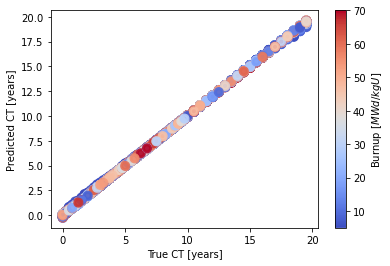

14.494742640102446 days


In [29]:
plt.scatter(y_test['CT']/365, scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,0]/365, c=subfuel.loc[y_test.index]['BU'], cmap='coolwarm', s=50, alpha=0.9, lw=3)
plt.ylabel("Predicted CT [years]")
plt.xlabel("True CT [years]")
cbar = plt.colorbar()
cbar.set_label(r'Burnup [$MWd/kgU]$')
plt.savefig('/Users/vaibhavmishra/Downloads/NNtest.png',dpi=300)
# _ = plt.plot([10, 70], [10, 70])
plt.show()
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test['CT'], scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,0], squared=False), r"days")

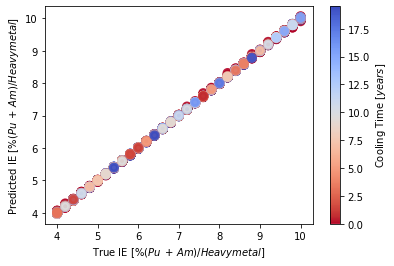

0.007189926690229239 %(Pu + Am)/Heavy metal


In [34]:
# preds = model.predict(x_test)
plt.scatter(y_test['IE'], scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,2], c=subfuel.loc[y_test.index]['CT']/365, cmap='coolwarm_r', s=50, alpha=0.9, lw=3)
plt.ylabel("Predicted IE $[\%(Pu + Am)/Heavy metal]$")
plt.xlabel("True IE $[\%(Pu + Am)/Heavy metal]$")
cbar = plt.colorbar()
cbar.set_label(r'Cooling Time [$years]$')
plt.savefig('/Users/vaibhavmishra/Downloads/NNtest1.png',dpi=300)
# _ = plt.plot([10, 70], [10, 70])
plt.show()
print(mean_squared_error(y_test['IE'], scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,2], squared=False), r"%(Pu + Am)/Heavy metal")

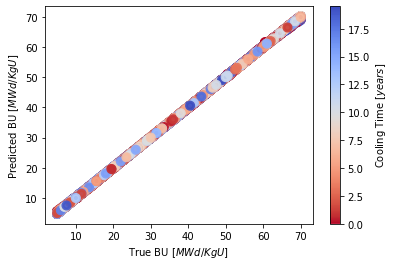

0.0842796747873332 MWd/KgU


In [31]:
# preds = model.predict(x_test)
plt.scatter(y_test['BU'], scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,1], c=subfuel.loc[y_test.index]['CT']/365, cmap='coolwarm_r', s=50, alpha=0.9, lw=3)
plt.ylabel(r'Predicted BU [$MWd/KgU]$')
plt.xlabel(r'True BU [$MWd/KgU]$')
cbar = plt.colorbar()
cbar.set_label(r'Cooling Time [$years]$')
plt.savefig('/Users/vaibhavmishra/Downloads/NNtest2.png',dpi=300)
# _ = plt.plot([10, 70], [10, 70])
plt.show()
print(mean_squared_error(y_test['BU'], scaler_y.inverse_transform(model.predict(scaler.transform(x_test)))[:,1], squared=False), r"MWd/KgU")

## Classification problem

Do some basic classification, maybe with tensorflow? Show some Fault rates, or something like that.


In [44]:
print(pd.read_csv('UU_PWR_UOX-MOX.csv', index_col=0, nrows=0).columns.tolist())

['BU', 'CT', 'IE', 'fuelType', 'TOT_SF', 'TOT_GSRC', 'TOT_A', 'TOT_H', 'H1', 'H2', 'H3', 'He3', 'He4', 'Li6', 'Li7', 'Be9', 'B10', 'B11', 'C12', 'N14', 'N15', 'O16', 'O17', 'Ga69', 'Ga71', 'Ge70', 'Ge72', 'Ge73', 'Ge74', 'Ge76', 'As74', 'As75', 'Se74', 'Se76', 'Se77', 'Se78', 'Se79', 'Se80', 'Se82', 'Br79', 'Br81', 'Kr78', 'Kr80', 'Kr82', 'Kr83', 'Kr84', 'Kr85', 'Kr86', 'Rb85', 'Rb86', 'Rb87', 'Sr84', 'Sr86', 'Sr87', 'Sr88', 'Sr89', 'Sr90', 'Y89', 'Y90', 'Y91', 'Zr90', 'Zr91', 'Zr92', 'Zr93', 'Zr94', 'Zr95', 'Zr96', 'Nb93', 'Nb94', 'Nb95', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'Mo99', 'Mo100', 'Tc99', 'Ru98', 'Ru99', 'Ru100', 'Ru101', 'Ru102', 'Ru103', 'Ru104', 'Ru105', 'Ru106', 'Rh103', 'Rh105', 'Pd102', 'Pd104', 'Pd105', 'Pd106', 'Pd107', 'Pd108', 'Pd110', 'Ag107', 'Ag109', 'Ag111', 'Ag110m', 'Cd106', 'Cd108', 'Cd110', 'Cd111', 'Cd112', 'Cd113', 'Cd114', 'Cd115', 'Cd116', 'Cd115m', 'In113', 'In115', 'Sn112', 'Sn113', 'Sn114', 'Sn115', 'Sn116', 'Sn117', 'Sn118', 'Sn119', 'Sn

In [45]:
colInterest=['BU','CT','IE','fuelType','Ru106','Cs134','Eu154','Cs137','TOT_SF','TOT_GSRC', 'TOT_A','Pu236','Pu237','Pu238', 'Pu239','Pu240','Pu241','Pu242','Pu243','Pu244']
fueldata=pd.read_csv('UU_PWR_UOX-MOX.csv',header = 0, usecols=colInterest)
fueldata.head()

,BU,CT,IE,fuelType,TOT_SF,TOT_GSRC,TOT_A,Ru106,Cs134,Cs137,Eu154,Pu236,Pu237,Pu238,Pu239,Pu240,Pu241,Pu242,Pu243,Pu244
0,5.0,0.00,1.5,UOX,5.01445,1.196600e+13,1.084540e+13,1.505257e-06,1.924658e-07,0.000008,2.945246e-08,4.160911e-16,1.138704e-13,4.716275e-08,0.000062,0.00001,0.000003,2.384159e-07,5.640417e-11,1.022307e-12
1,5.0,91.25,1.5,UOX,3.91920,2.959020e+11,5.848210e+11,1.269661e-06,1.769621e-07,0.000008,2.886479e-08,3.920824e-16,2.807413e-14,4.982796e-08,0.000064,0.00001,0.000003,2.384275e-07,3.760617e-27,1.022400e-12
2,5.0,182.50,1.5,UOX,3.11170,1.181050e+11,2.796190e+11,1.070940e-06,1.627073e-07,0.000008,2.828885e-08,3.694653e-16,6.921396e-15,5.021822e-08,0.000064,0.00001,0.000003,2.384274e-07,3.760617e-27,1.022400e-12
3,5.0,273.75,1.5,UOX,2.56308,5.384120e+10,1.670140e+11,9.033212e-07,1.496008e-07,0.000007,2.772439e-08,3.481593e-16,1.706382e-15,5.045058e-08,0.000064,0.00001,0.000003,2.384274e-07,3.760617e-27,1.022400e-12
4,5.0,365.00,1.5,UOX,2.19006,2.882190e+10,1.173000e+11,7.619375e-07,1.375500e-07,0.000007,2.717120e-08,3.280883e-16,4.206838e-16,5.057591e-08,0.000064,0.00001,0.000003,2.384273e-07,3.760617e-27,1.022400e-12


In [87]:
# define model search structure
def nn_model1(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=128,
                                            step=16),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adamax(
        hp.Choice('learning_rate', values=[1e-1, 1e-2])),
        loss=tf.keras.losses.binary_crossentropy,
        metrics=['accuracy'])
    return model

In [48]:
############### feature selection
features = ['Ru106','Cs134','Eu154','Cs137','TOT_SF','TOT_GSRC', 'TOT_A','Pu236','Pu237','Pu238', 'Pu239','Pu240','Pu241','Pu242','Pu243','Pu244']
df_f = fueldata[(fueldata['CT']/365<70.0)] #consider assemblies with CT<70
x_in = df_f[features] #prediction features (3 important isotopes)
y_in = df_f[['fuelType']] #cooling time: output variable
x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size=0.4) ##train-test split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5) ##val-test split
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_train)
x_vl = scaler.transform(x_val)
x_te = scaler.transform(x_test)

# encode output values in 0 or 1
from sklearn.preprocessing import LabelEncoder
encoder_y = LabelEncoder()
y_tr = encoder_y.fit_transform(y_train.values.ravel())
y_vl = encoder_y.transform(y_val.values.ravel())
y_te = encoder_y.transform(y_test.values.ravel())

In [ ]:
# define Bayesian search parameters
tunerc = kt.tuners.bayesian.BayesianOptimization(
    nn_model1,
    objective=kt.Objective('accuracy', direction="max"),
    max_trials=100,
    executions_per_trial=2,    
    directory='/Users/vaibhavmishra/Downloads/IAEA/classifiaction/',
    project_name='PWRNN3varboptc')

# begin search
tunerc.search(x_tr, y_tr, epochs=20, validation_data=(x_vl, y_vl))

In [49]:
# Build model
model = Sequential()
model.add(Dense(64, input_dim=16, kernel_initializer='RandomNormal', activation='relu')) #layer 0
model.add(Dense(32, activation='linear'))  #layer 1
model.add(Dense(16, activation='tanh')) #layer 2
model.add(Dense(1, activation='sigmoid'))
model.summary()

import _datetime
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + _datetime.date.today().strftime("%Y%m%d-%H%M%S")
opt = keras.optimizers.Adamax(learning_rate=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0000001, verbose=1)
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='accuracy', verbose=1,save_best_only=True, mode='auto', period=1)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=opt, metrics='accuracy')

# Begin training model
history = model.fit(x_tr, y_tr, epochs=15, batch_size=100000,  verbose=1, validation_data=(x_vl, y_vl), callbacks=[tensorboard_callback, checkpoint, reduce_lr])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
8/8 [==============================] - 2s 136ms/step - loss: 0.7156 - accuracy: 0.2559 - val_loss: 0.6952 - val_accuracy: 0.6227

Epoch 00001: accuracy improved from -inf to 0.36447, saving model to best_model.hdf5
Epoch 2/15
8/8 [==========

In [50]:
# Make ROC curve
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_te).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_te, y_pred_keras)

In [51]:
# Compute AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

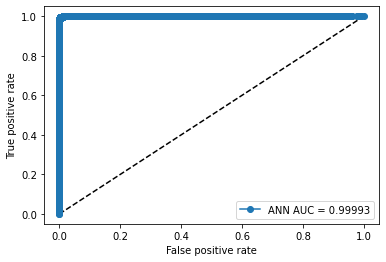

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN AUC = {:.5f}'.format(auc_keras), marker='o')
#plt.plot(fpr_rf, tpr_rf, label='RFR AUC = {:.5f}'.format(auc_rf), marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc.png')
plt.show()